In [13]:
import io
import os
import string
from os import path
from wordcloud import WordCloud

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
#d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

In [24]:
# It is important to use io.open to correctly load the file as UTF-8
d = os.path.expanduser("~/Dropbox/insight/Emoji/")
fullfile = os.path.expanduser("~/Dropbox/insight/Emoji/happy-emoji.txt")
text = io.open(fullfile).read()
text = io.open(path.join(d, 'happy-emoji.txt')).read()

In [25]:
text = "😅 🤓 😙 😅 😙 😅 😕 😕 🤡 😅"

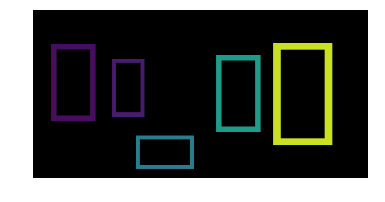

In [27]:
# the regex used to detect words is a combination of normal words, ascii art, and emojis
# 2+ consecutive letters (also include apostrophes), e.x It's
normal_word = r"(?:\w[\w']+)"
# 2+ consecutive punctuations, e.x. :)
ascii_art = r"(?:[{punctuation}][{punctuation}]+)".format(punctuation=string.punctuation)
# a single character that is not alpha_numeric or other ascii printable
emoji = r"(?:[^\s])(?<![\w{ascii_printable}])".format(ascii_printable=string.printable)
regexp = r"{normal_word}|{ascii_art}|{emoji}".format(normal_word=normal_word, ascii_art=ascii_art,
                                                     emoji=emoji)

# Generate a word cloud image
# The Symbola font includes most emoji
font_path = path.join("/System/Library/Fonts/",'Apple\ Color\ Emoji.ttc')
# wordcloud = WordCloud(font_path=font_path, regexp=regexp).generate(text)
wordcloud = WordCloud(regexp=regexp).generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### GENRATE WORDCLOUD FROM MODEL per emoji...

In [14]:
text = "the regex used to detect words is a combination of normal words, ascii art, and emojis"
wordcloud = WordCloud.generate(text)


TypeError: generate() missing 1 required positional argument: 'text'

In [ ]:
wordcloud.to_file("img/first_review.png")

In [22]:
K = ["this", "is", "!"]
V = [0.2,0.5,1]
d = {}
for ii in range(3):
    k = K[ii]
    v = V[ii]
    d[k] = v

import matplotlib.pyplot as plt
wordcloud = WordCloud(width=900,height=500, max_words=1628,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Visualize weights

In [1]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial').fit(X, y)
clf.predict(X[:2, :])




clf.score(X, y)

0.9733333333333334

In [2]:
clf.predict_proba(X[:2, :]) 

array([[9.81803812e-01, 1.81961737e-02, 1.43433332e-08],
       [9.71802148e-01, 2.81978218e-02, 2.97622895e-08]])

In [3]:
X.shape

(150, 4)

In [6]:
clf.get_params

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': 1,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [8]:
# coef_ : array, shape (1, n_features) or (n_classes, n_features)
Coef = clf.coef_
Coef.shape

(3, 4)

In [11]:
print(Coef[0,:])

[-0.42336421  0.96165823 -2.51937885 -1.0861391 ]
